<a href="https://colab.research.google.com/github/codegithubka/Physics-4AL-Gooogle-Collab-Files/blob/main/Lab3B/C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least squares fitting

One way to analyze this system is by obtaining a function that fits the data. We know that simple harmonic motion has a sinusoidal profile so we will try to fit the best fit sinusoidal function. This is not as simple as using the np.polyfit but this will give you an idea of what goes behind the scenes of np.polyfit

We plot our ultrasound data again as a start. We'll use the[ example data](https://drive.google.com/open?id=1mRAl6J92CvmfPjvzcUuCasVbSuXsWL5i) from the pre-lab, but you will be expected to do this procedure on your own data for the lab report.

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Mounted at drive


# Your analysis

Plot and fit your own data below 

In [2]:
# Read in your time and position data
import numpy as np
import matplotlib.pyplot as plt

read_in_array = np.loadtxt('/content/drive/MyDrive/oscillation data 2.txt',delimiter=',')


Below are the functions you need for the fit

In [3]:
def sin_fit_fun(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.sin(omega * time + phi) + offset
  return y

Plot your time vs position data

In [18]:
# Array to store elapsed time
x_axis = read_in_array[:,0]
elapsed_time = (x_axis-x_axis[0])/1000.

# Array to store acceleration in x
acc_data_unrefined = read_in_array[:,2]

# Array to store ultrasound sensor data
ultrasound_unrefined = read_in_array[:,1]
ultrasound = ultrasound_unrefined/100.

Text(0.5, 1.0, 'Time vs. Position')

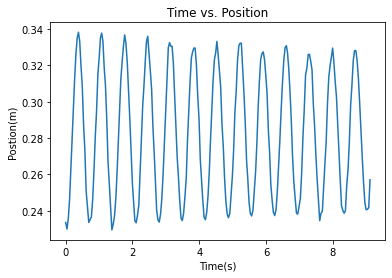

In [19]:
# Make a plot
plt.plot(elapsed_time, ultrasound)

# Axis labels
plt.xlabel('Time(s)')
plt.ylabel('Postion(m)')

# Title
plt.title('Time vs. Position')

Text(0.5, 1.0, 'Time vs. Position')

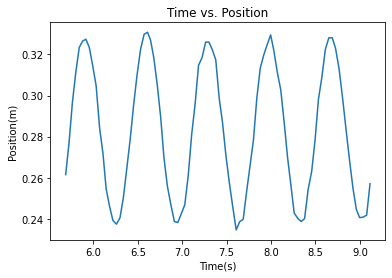

In [20]:
 # define your starting time
start_time = 141

# Clip your data
# ultrasound_window = ultrasound[start_time:1000]
# elapsed_time_window = elapsed_time[start_time:1000]
ultrasound_window = ultrasound[start_time:1000]
elapsed_time_window = elapsed_time[start_time:1000]

# Make a plot
plt.plot(elapsed_time_window, ultrasound_window)
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Time vs. Position')

In [8]:
def get_residuals(parameters, data, x):
  residuals = np.abs(data - sin_fit_fun(parameters, x))
  return -residuals

In [21]:
from scipy.optimize import least_squares

# Make your guess parameters 

# Guess a
guess_amplitude = 0.05

# guess omega
guess_omega = 9

# guess phi = 0
guess_phi = 0

# Guess offset
guess_offset = 0.28

guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi]

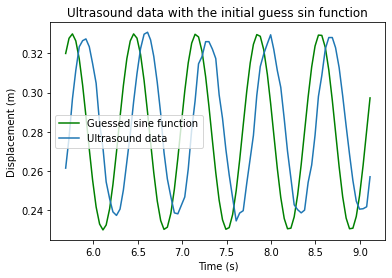

In [22]:
# Graph with guessed values vs original 
theoretical_guess_function = sin_fit_fun(guess_parameters, elapsed_time_window)
plt.plot(elapsed_time_window, theoretical_guess_function,color="green",label="Guessed sine function")
plt.plot(elapsed_time_window, ultrasound_window, label="Ultrasound data")

plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Ultrasound data with the initial guess sin function")
plt.legend()

In [23]:
# The imported least_squares function minimizes the residuals
res_lsq = least_squares(get_residuals, guess_parameters, 
args=(ultrasound_window,elapsed_time_window))

# We store the values of best possible paremeters obtained for amplitude, omega, offset and phase in best_parameters
best_parameters = res_lsq['x']

res_lsq = least_squares(get_residuals, guess_parameters, 
                        args=(ultrasound_window,elapsed_time_window))

best_parameters = res_lsq['x']


In [24]:
# Best ampplitude
print('Best Amplitude: ' + str(best_parameters[0]))

# Best omega
print('Best Omega: ' + str(best_parameters[1]))

# Best phi
print('Best Phi: ' + str(best_parameters[3]))

# Best guess offset
print('Best offset: ' + str(best_parameters[2]))

Best Amplitude: 0.04585190410820856
Best Omega: 9.080327891412553
Best Phi: -1.7863920615902416
Best offset: 0.28298790337615676


Text(0.5, 1.0, 'Ultrasound data with the best fit sin function')

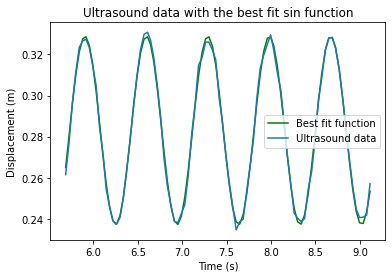

In [25]:
# Plot the fit
fitted_function = sin_fit_fun(best_parameters, elapsed_time_window)
plt.plot(elapsed_time_window, fitted_function, color = 'green', label="Best fit function")

# Plot the data
plt.plot(elapsed_time_window, ultrasound_window,label="Ultrasound data")

# Legend
plt.legend()

# axis labels
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")

#title
plt.title("Ultrasound data with the best fit sin function")



Text(0.5, 1.0, 'Acceleration vs Time')

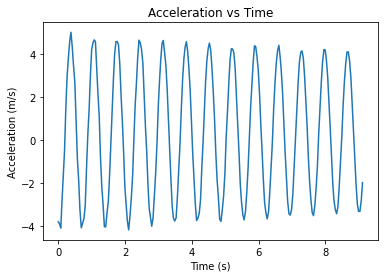

In [26]:
osc_time = (read_in_array[:,0]/1000)-(read_in_array[0,0]/1000)
osc_disp = read_in_array[:,1]/100

x_axis = read_in_array[:,2]
y_axis = read_in_array[:,3]
z_axis = read_in_array[:,4]

slope = (-9.81) / (17025.56-657.0)
x_acc = slope*(-x_axis) + 9.8

plt.plot(osc_time, x_acc)
plt.ylabel('Acceleration (m/s)')
plt.xlabel('Time (s)')
plt.title('Acceleration vs Time')

Text(0.5, 1.0, 'Time bs Acceleration')

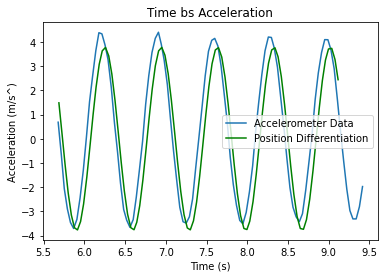

In [29]:
start_time = 133
x_acc_window = x_acc[start_time:1000]
osc_time_window = osc_time[start_time:1000]

plt.plot(osc_time_window + 0.3, x_acc_window, label='Accelerometer Data')

acc_fit = -best_parameters[0]*(best_parameters[1]**2)*np.sin(best_parameters[1]*elapsed_time_window+best_parameters[3])
plt.plot(elapsed_time_window, acc_fit, color = 'green', label='Position Differentiation')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^)')
plt.title('Time bs Acceleration')

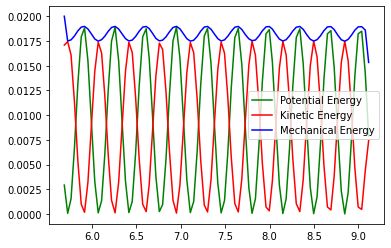

In [30]:
#Potential Energy Function

fitted_function = sin_fit_fun(best_parameters, elapsed_time_window)
pe_fun = 0.5*18.06*(fitted_function-best_parameters[2])**2
plt.plot(elapsed_time_window,pe_fun, color='green',label='Potential Energy')

#Kinetic Energy Function
vel_fit = np.gradient(fitted_function,elapsed_time_window)
ke_fun = 0.5*0.210*vel_fit**2
plt.plot(elapsed_time_window,ke_fun, color='red',label='Kinetic Energy')

#Mechanical Energy Function
me_fun = pe_fun + ke_fun
plt.plot(elapsed_time_window,me_fun,color='blue',label='Mechanical Energy')
plt.legend()



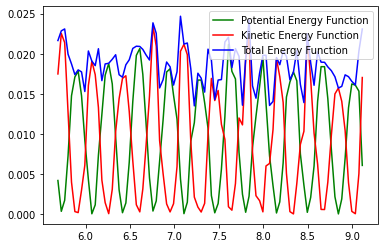

In [35]:
#Raw Data

#PE
potential_energy = 0.5 * 18.06 * (ultrasound_window - best_parameters[2])**2
plt.plot(elapsed_time_window, potential_energy, color = 'green', label="Potential Energy Function")

#KE
velocity = np.gradient(ultrasound_window,elapsed_time_window)
kinetic_energy = 0.5 * 0.210 * velocity**2
plt.plot(elapsed_time_window, kinetic_energy, color = 'red', label = "Kinetic Energy Function")

#ME
mechanical_energy = potential_energy + kinetic_energy
plt.plot(elapsed_time_window, mechanical_energy, color = 'blue', label = "Total Energy Function")
plt.legend()